In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os,sys
sys.path.insert(0,"..")
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision
import sys
import torch.nn.functional as F
import tqdm
import sklearn, sklearn.metrics
import pandas as pd
import torchxrayvision as xrv
import skimage

In [3]:
d_nih = xrv.datasets.NIH_Dataset(imgpath="/home/users/joecohen/group/joecohen/images-512-NIH")
xrv.datasets.relabel_dataset(xrv.datasets.default_pathologies, d_nih)

Lung Lesion doesn't exist. Adding nans instead.
Fracture doesn't exist. Adding nans instead.
Lung Opacity doesn't exist. Adding nans instead.
Enlarged Cardiomediastinum doesn't exist. Adding nans instead.


{'Atelectasis': 0.0,
 'Consolidation': 0.0,
 'Infiltration': 0.0,
 'Pneumothorax': 0.0,
 'Edema': 0.0,
 'Emphysema': 0.0,
 'Fibrosis': 0.0,
 'Effusion': 0.0,
 'Pneumonia': 0.0,
 'Pleural_Thickening': 1.0,
 'Cardiomegaly': 0.0,
 'Nodule': 0.0,
 'Mass': 0.0,
 'Hernia': 0.0,
 'Lung Lesion': nan,
 'Fracture': nan,
 'Lung Opacity': nan,
 'Enlarged Cardiomediastinum': nan}

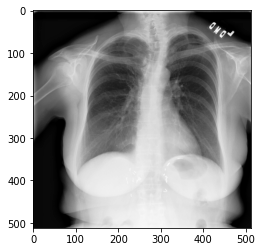

In [4]:
sample = d_nih[100]
plt.imshow(sample["img"][0], cmap="Greys_r");
dict(zip(d_nih.pathologies,sample["lab"]))

In [5]:
ae = xrv.autoencoders.ResNetAE(weights="101-elastic")

In [6]:
out = ae(torch.from_numpy(sample["img"][None,...]))

In [7]:
img_r = out['out'].detach().numpy()

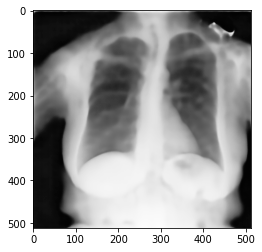

In [8]:
plt.imshow(img_r[0][0], cmap="Greys_r");

In [9]:
img = skimage.io.imread("../tests/00000001_000.png")
img = xrv.datasets.normalize(img, 255)  

# Check that images are 2D arrays
if len(img.shape) > 2:
    img = img[:, :, 0]
if len(img.shape) < 2:
    print("error, dimension lower than 2 for image")

# Add color channel
img = img[None, :, :]                    

transform = torchvision.transforms.Compose([xrv.datasets.XRayCenterCrop(),
                                            xrv.datasets.XRayResizer(224)])
img = transform(img)
img = torch.from_numpy(img).unsqueeze(0)

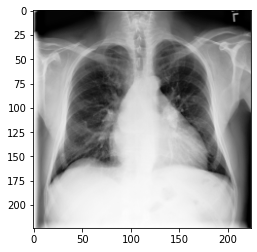

In [10]:
plt.imshow(img.numpy()[0][0], cmap="Greys_r");

In [11]:
out = ae(img)

In [12]:
img_r = out['out'].detach().numpy()

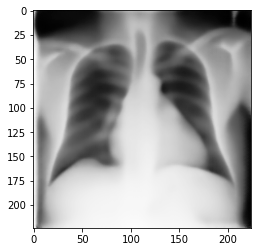

In [13]:
plt.imshow(img_r[0][0], cmap="Greys_r");